In [1]:
import sys
import requests
from time import sleep
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt

# Requête 

In [2]:
# Variable initialisation
cpt=0
N_request = 10
category = ['tiny','small','medium','large']
listCourse = []

In [3]:
def request(category,cpt) :
	r = requests.get('http://tortues.ecoquery.os.univ-lyon1.fr:8080/'+str(category))
	r_json = r.json()
	recs = r_json['tortoises']
	df = pd.json_normalize(recs)
	df['iterration_update'] = cpt
	return df

In [4]:
while cpt < N_request :
	print('Requete '+str(cpt+1))
	res = request('tiny',cpt)
	listCourse.append(res)
	sleep(3)
	cpt += 1
	


Requete 1
Requete 2
Requete 3
Requete 4
Requete 5
Requete 6
Requete 7
Requete 8
Requete 9
Requete 10


# Conversion dataframe

In [ ]:
df = pd.concat(listCourse)
df['vitesse'] = 0

In [5]:
df.loc[df.iterration_update == 0,'vitesse'] = -1
df.head(20)

,id,top,position,iterration_update,vitesse
0,0,22340,4029191,0,-1
1,1,22340,8164868,0,-1
2,2,22340,4503497,0,-1
3,3,22340,4318287,0,-1
4,4,22340,4154688,0,-1
5,5,22340,2993184,0,-1
6,6,22340,7707300,0,-1
7,7,22340,4340580,0,-1
8,8,22340,2342134,0,-1
9,9,22340,4001384,0,-1


In [6]:
df = df.sort_values(by=['id','top'])

In [7]:
df ['ecart_position_avec_precedent'] = df.groupby('id')['position'].diff()

# Visualisation 

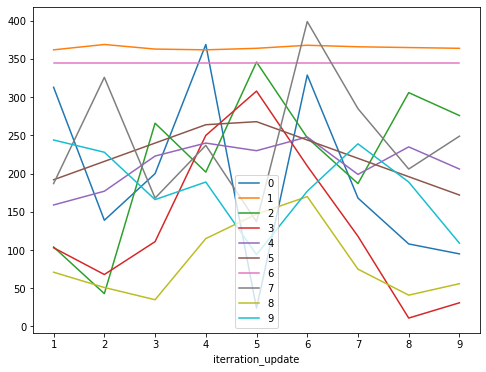

In [9]:

fig, ax = plt.subplots(figsize=(8,6))

for i, g in df.groupby('id'):
    g.plot(x='iterration_update', y='ecart_position_avec_precedent', ax=ax, label=str(i))

plt.show()

# Calcul des vitesses

In [10]:
df_ecart = df[df['vitesse'] != -1]
df_ecart

,id,top,position,iterration_update,vitesse,ecart_position_avec_precedent
0,0,22341,4029504,1,0,313.0
0,0,22342,4029643,2,0,139.0
0,0,22343,4029843,3,0,200.0
0,0,22344,4030212,4,0,369.0
0,0,22345,4030236,5,0,24.0
...,...,...,...,...,...,...
9,9,22345,4002305,5,0,94.0
9,9,22346,4002482,6,0,177.0
9,9,22347,4002721,7,0,239.0
9,9,22348,4002910,8,0,189.0


In [11]:
df_ecart = df_ecart.drop('vitesse', 1)
df_ecart

,id,top,position,iterration_update,ecart_position_avec_precedent
0,0,22341,4029504,1,313.0
0,0,22342,4029643,2,139.0
0,0,22343,4029843,3,200.0
0,0,22344,4030212,4,369.0
0,0,22345,4030236,5,24.0
...,...,...,...,...,...
9,9,22345,4002305,5,94.0
9,9,22346,4002482,6,177.0
9,9,22347,4002721,7,239.0
9,9,22348,4002910,8,189.0


In [12]:
df_join = df_ecart.groupby('id').agg(lambda x: x.tolist())

In [13]:
df_join

,top,position,iterration_update,ecart_position_avec_precedent
id,,,,
0,"[22341, 22342, 22343, 22344, 22345, 22346, 223...","[4029504, 4029643, 4029843, 4030212, 4030236, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[313.0, 139.0, 200.0, 369.0, 24.0, 329.0, 168...."
1,"[22341, 22342, 22343, 22344, 22345, 22346, 223...","[8165230, 8165599, 8165962, 8166324, 8166688, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[362.0, 369.0, 363.0, 362.0, 364.0, 368.0, 366..."
2,"[22341, 22342, 22343, 22344, 22345, 22346, 223...","[4503601, 4503644, 4503910, 4504112, 4504458, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[104.0, 43.0, 266.0, 202.0, 346.0, 247.0, 187...."
3,"[22341, 22342, 22343, 22344, 22345, 22346, 223...","[4318390, 4318458, 4318569, 4318819, 4319127, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[103.0, 68.0, 111.0, 250.0, 308.0, 210.0, 118...."
4,"[22341, 22342, 22343, 22344, 22345, 22346, 223...","[4154847, 4155024, 4155247, 4155487, 4155717, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[159.0, 177.0, 223.0, 240.0, 230.0, 248.0, 199..."
5,"[22341, 22342, 22343, 22344, 22345, 22346, 223...","[2993376, 2993592, 2993832, 2994096, 2994364, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[192.0, 216.0, 240.0, 264.0, 268.0, 244.0, 220..."
6,"[22341, 22342, 22343, 22344, 22345, 22346, 223...","[7707645, 7707990, 7708335, 7708680, 7709025, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[345.0, 345.0, 345.0, 345.0, 345.0, 345.0, 345..."
7,"[22341, 22342, 22343, 22344, 22345, 22346, 223...","[4340767, 4341093, 4341261, 4341498, 4341635, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[187.0, 326.0, 168.0, 237.0, 137.0, 399.0, 285..."
8,"[22341, 22342, 22343, 22344, 22345, 22346, 223...","[2342205, 2342256, 2342291, 2342406, 2342553, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[71.0, 51.0, 35.0, 115.0, 147.0, 170.0, 75.0, ..."


# Typage

In [23]:
def typeTurtle(array) :
    if (all(x == array[0] for x in array)) :
        return 'régulier'
    else :
        pass
        

In [25]:
df_join['type'] = df_join['ecart_position_avec_precedent'].apply(lambda x : typeTurtle(x))

In [26]:
df_join

,top,position,iterration_update,ecart_position_avec_precedent,type
id,,,,,
0,"[22341, 22342, 22343, 22344, 22345, 22346, 223...","[4029504, 4029643, 4029843, 4030212, 4030236, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[313.0, 139.0, 200.0, 369.0, 24.0, 329.0, 168....",None
1,"[22341, 22342, 22343, 22344, 22345, 22346, 223...","[8165230, 8165599, 8165962, 8166324, 8166688, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[362.0, 369.0, 363.0, 362.0, 364.0, 368.0, 366...",None
2,"[22341, 22342, 22343, 22344, 22345, 22346, 223...","[4503601, 4503644, 4503910, 4504112, 4504458, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[104.0, 43.0, 266.0, 202.0, 346.0, 247.0, 187....",None
3,"[22341, 22342, 22343, 22344, 22345, 22346, 223...","[4318390, 4318458, 4318569, 4318819, 4319127, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[103.0, 68.0, 111.0, 250.0, 308.0, 210.0, 118....",None
4,"[22341, 22342, 22343, 22344, 22345, 22346, 223...","[4154847, 4155024, 4155247, 4155487, 4155717, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[159.0, 177.0, 223.0, 240.0, 230.0, 248.0, 199...",None
5,"[22341, 22342, 22343, 22344, 22345, 22346, 223...","[2993376, 2993592, 2993832, 2994096, 2994364, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[192.0, 216.0, 240.0, 264.0, 268.0, 244.0, 220...",None
6,"[22341, 22342, 22343, 22344, 22345, 22346, 223...","[7707645, 7707990, 7708335, 7708680, 7709025, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[345.0, 345.0, 345.0, 345.0, 345.0, 345.0, 345...",régulier
7,"[22341, 22342, 22343, 22344, 22345, 22346, 223...","[4340767, 4341093, 4341261, 4341498, 4341635, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[187.0, 326.0, 168.0, 237.0, 137.0, 399.0, 285...",None
8,"[22341, 22342, 22343, 22344, 22345, 22346, 223...","[2342205, 2342256, 2342291, 2342406, 2342553, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[71.0, 51.0, 35.0, 115.0, 147.0, 170.0, 75.0, ...",None
